In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Global settings for MatPlotlib
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
plt.rcParams["axes.labelpad"]='10'

# Use the same Font as LaTeX
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.formatter.use_mathtext"] = True

In [3]:
lqr_color = '#FFBE0B'
skvi_color = '#FB5607'
sac_q_color = '#FF006E'
sac_v_color = '#8338EC'
sakc_color = '#3A86FF'

Setting the path to the individual parquet files to load from for the Pandas data frames

In [4]:
data_value_fn_1 = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/Interpretability/function1/episodic_returns.parquet.gz"
data_value_fn_2 = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/Interpretability/function2/episodic_returns.parquet.gz"
data_value_fn_3 = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/Interpretability/function3/episodic_returns.parquet.gz"
data_baseline = "/Users/lpaehler/Work/ReinforcementLearning/KoopmanRL/DataLogs/EpisodicReturns50/FluidFlow/SKVI/episodic_returns.parquet.gz"

Loading all 4 value functions, and their episodic returns into their respective data frames

In [5]:
# Loading of the value functions
value_fn1_dataframe = pd.read_parquet(data_value_fn_1)
value_fn2_dataframe = pd.read_parquet(data_value_fn_2)
value_fn3_dataframe = pd.read_parquet(data_value_fn_3)

# Loading of the baseline
baseline_dataframe = pd.read_parquet(data_baseline)

Used plotting command for the style of the plot we want

```bash
rl_plotter --show --save --avg_group --shaded_err --shaded_std --filename q --filters Walker HalfCheetah --ykey bias real_q --yduel --style default --smooth 0
```

Import settings

In [ ]:
fig_length=6
fig_width=6
style=None
title=None
xlabel=None
ylabel=None
xkey='l'
ykey=['r']
yduel=False
xscale=1
smooth_radius=0
resample=0
smooth_step=1.0
average_group=False
shaded_std=True
shaded_err=False
legend_outside=False
legend_loc=0
legend_group_num=True
legend_borderpad=1.0
legend_labelspacing=1.0

In [6]:
# Universal index
xs = baseline_dataframe.index

In [7]:
# Values for the baseline
ymean_baseline = baseline_dataframe.mean(axis=1)
ystd_baseline = baseline_dataframe.std(axis=1)

In [8]:
# Values for function 1
ymean_fn1 = value_fn1_dataframe.mean(axis=1)
ystd_fn1 = value_fn1_dataframe.std(axis=1)

In [9]:
# Values for function 2
ymean_fn2 = value_fn2_dataframe.mean(axis=1)
ystd_fn2 = value_fn2_dataframe.std(axis=1)

In [10]:
# Values for function 3
ymean_fn3 = value_fn3_dataframe.mean(axis=1)
ystd_fn3 = value_fn3_dataframe.std(axis=1)

Text(-0.03, 0.5, 'Episodic Return')

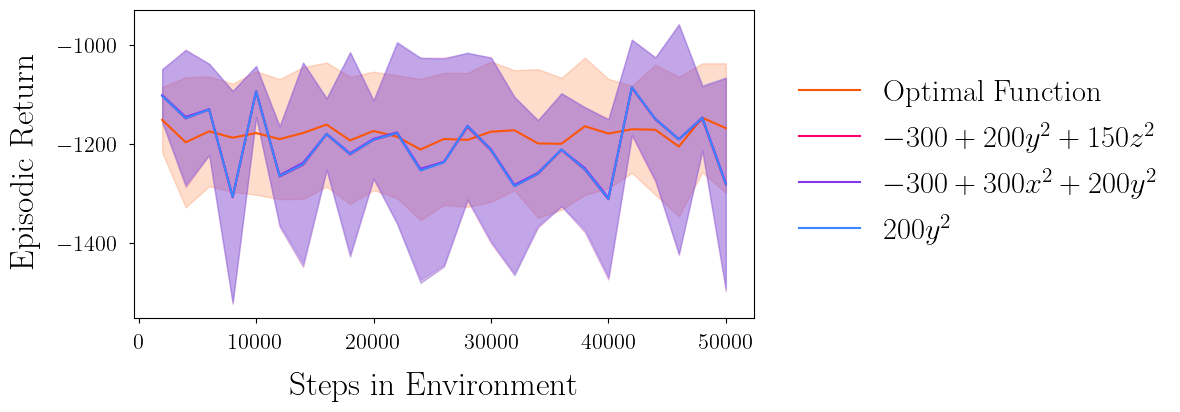

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(8, 4))

axes.plot(xs, ymean_baseline, color=skvi_color, label="Optimal Function")
axes.fill_between(xs, ymean_baseline - ystd_baseline, ymean_baseline + ystd_baseline, color=skvi_color, alpha=.2)
axes.plot(xs, ymean_fn1, color=sac_q_color, label=r'$-300 + 200 y^{2} + 150 z^{2}$')
axes.fill_between(xs, ymean_fn1 - ystd_fn1, ymean_fn1 + ystd_fn1, color=sac_q_color, alpha=.2)
axes.plot(xs, ymean_fn2, color=sac_v_color, label=r'$-300 + 300 x^{2} + 200 y^{2}$')
axes.fill_between(xs, ymean_fn2 - ystd_fn2, ymean_fn2 + ystd_fn2, color=sac_v_color, alpha=.2)
axes.plot(xs, ymean_fn3, color=sakc_color, label=r'$200 y^{2}$')
axes.fill_between(xs, ymean_fn3 - ystd_fn3, ymean_fn3 + ystd_fn3, color=sakc_color, alpha=.2)

fig.legend(loc='center right', bbox_to_anchor=(1.44, 0.5), ncol=1, fontsize=22, frameon=False)

# Major x-, and y-labels
fig.supxlabel('Steps in Environment', fontsize=24, y=-0.1)
fig.supylabel('Episodic Return', fontsize=24, x=-0.03)